# Email Spam Detection With Machine Learning

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# Data Loading and Preprocessing:

In [2]:
df = pd.read_csv("C:\\Users\\vipul\\OneDrive\\Desktop\\spam.csv", encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df.drop(columns=df.columns[2:])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns = ['Category', 'Message']
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
set(df.duplicated())

{False, True}

In [7]:
df.duplicated().sum()

403

In [8]:
df = df.drop_duplicates(subset=['Message'])

In [9]:
df.duplicated().sum()

0

In [10]:
set(df.duplicated())

{False}

# EDA and Visualization:



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   object
 1   Message   5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [12]:
df.describe().T

,count,unique,top,freq
Category,5169,2,ham,4516
Message,5169,5169,"Go until jurong point, crazy.. Available only ...",1


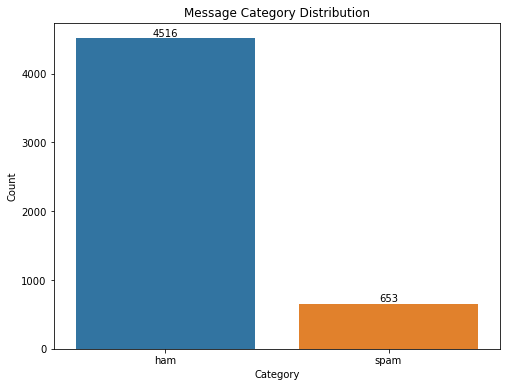

In [13]:
# Count the number of messages in each category
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Message Category Distribution')

# Add text with counts on the bars
for i, count in enumerate(category_counts['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


# Label Encoding:



In [14]:
df['spam']= df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


# Train-Test Split:



In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'],df['spam'], train_size=.8)

# Feature Extraction (Count Vectorization):



In [16]:
from sklearn.feature_extraction.text import CountVectorizer
featurizer = CountVectorizer()
X_train_count = featurizer.fit_transform(X_train.values)

In [17]:
X_train_count

<4135x7640 sparse matrix of type '<class 'numpy.int64'>'
	with 54312 stored elements in Compressed Sparse Row format>

# Model Training:



In [18]:
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [19]:
emails = [
    'Hey Mohamed, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = featurizer.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [20]:
X_test_count = featurizer.transform(X_test)
model.score(X_test_count, y_test)

0.9758220502901354

# Building a Pipeline:



In [21]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

## Evaluating the Pipeline:



In [22]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

### Making Predictions with the Pipeline:



In [23]:
clf.score(X_test,y_test)

0.9758220502901354

In [24]:
clf.predict(emails)

array([0, 1], dtype=int64)

# Confusion Matrix Visualization:

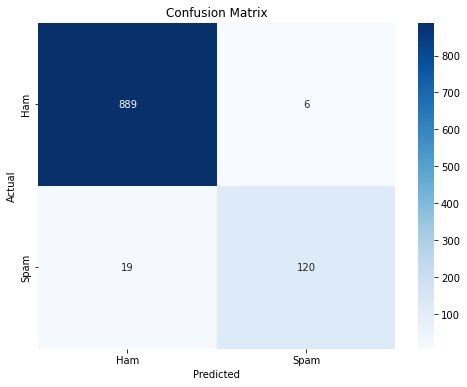

In [25]:
y_pred = model.predict(X_test_count)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
